In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [80]:
cab = pd.read_csv("cab_rides.csv")
weather = pd.read_csv("weather.csv")

In [81]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(4), object(6)
memory usage: 52.9+ MB


In [82]:
cab.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [83]:
cab.dropna(inplace=True)

<AxesSubplot:>

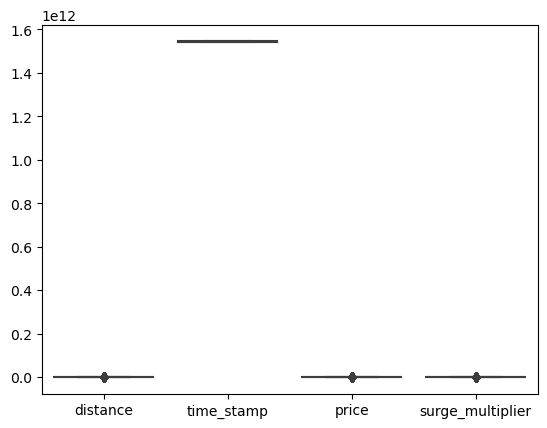

In [84]:
sns.boxplot(data=cab)

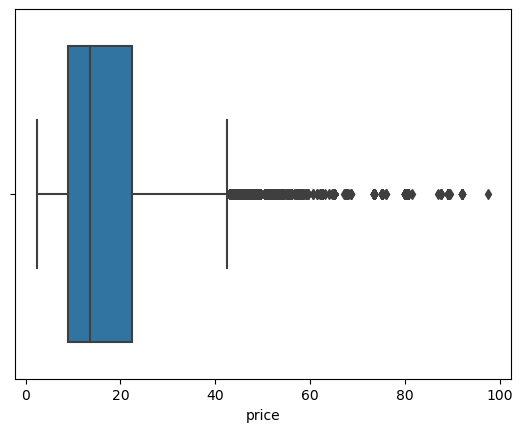

In [85]:
sns.boxplot(x=cab['price'])
plt.show()

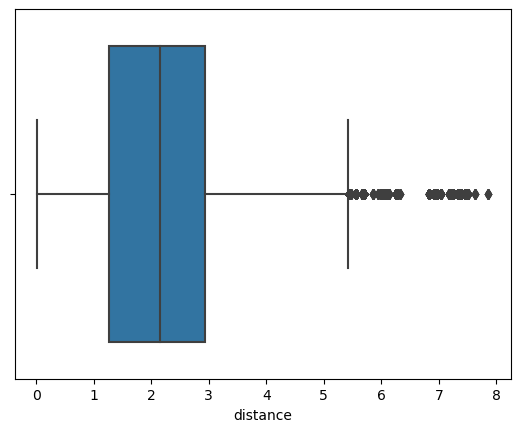

In [86]:
sns.boxplot(x=cab['distance'])
plt.show()

In [87]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
        # outlires are below lower limit and above upper limit
        outliers = ( ( df[col] < lower_limit) | (df[col] > upper_limit) )
        indecies=df[outliers].index
        print('number of outliers in {} is : {}'.format(col,len(indecies)))
        df.drop(indecies,inplace=True)

In [88]:
columns={'distance','surge_multiplier','price'}
remove_outliers(cab,columns)

number of outliers in distance is : 6672
number of outliers in price is : 4642
number of outliers in surge_multiplier is : 18158


In [89]:
#dropping id column as it is not a required one
cab.drop(['id'],axis=1,inplace=True)
cab.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL


In [90]:
cab['name'].value_counts()
# from the above table we can see WAV and UberX are the mostly used services

WAV             54053
UberX           54051
UberPool        54049
Black           54041
UberXL          54009
Black SUV       53496
Shared          51163
Lux             46972
Lyft            46972
Lyft XL         46972
Lux Black       46972
Lux Black XL    45754
Name: name, dtype: int64

In [91]:
cab['source'].value_counts()
#from the below table we can see the most cab service has been ordered from North End and the least is ordered from Financial District

North End                  52772
Haymarket Square           52727
West End                   51978
North Station              51706
South Station              51446
Beacon Hill                50782
Theatre District           50523
Boston University          50225
Fenway                     50163
Northeastern University    50121
Back Bay                   49070
Financial District         46991
Name: source, dtype: int64

In [92]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [93]:
# we will drop the rain column as the percentage of missing values is more which is 85%
weather.drop(['rain'],axis=1,inplace=True)

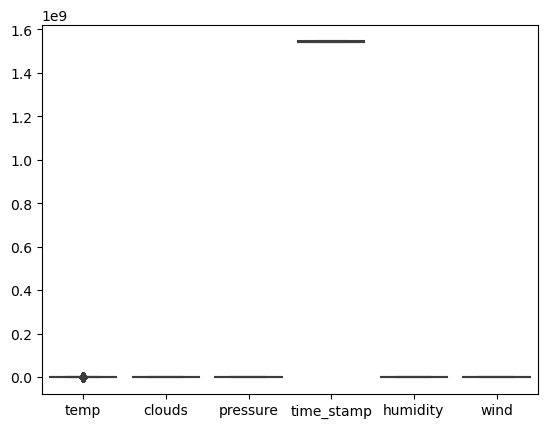

In [94]:
sns.boxplot(data=weather)
plt.show()

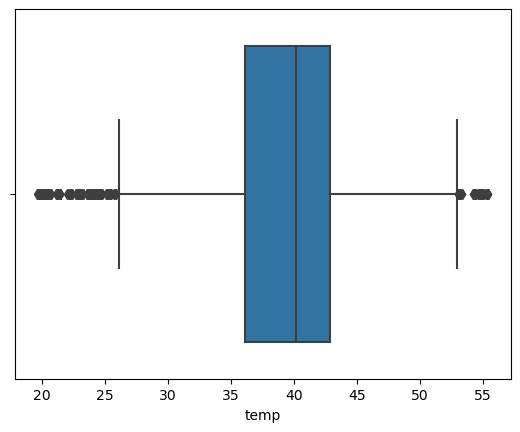

In [95]:
# only temp column has the outliers
sns.boxplot(x=weather['temp'])
plt.show()

In [96]:
remove_outliers(weather,['temp'])

number of outliers in temp is : 266


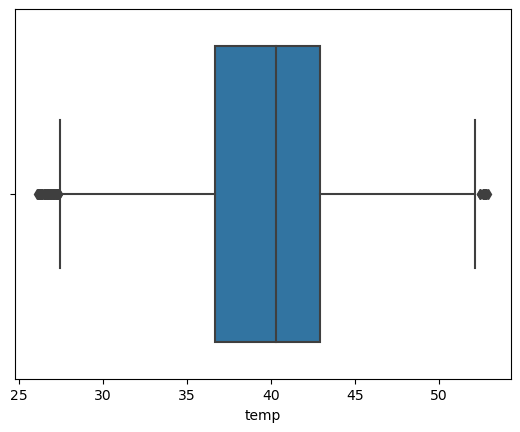

In [97]:
sns.boxplot(x=weather['temp'])
plt.show()
# we can still see the outliers
#That means that we have a non-normal distribution data, so we will use median absolute deviation method that can treat with such problem

In [98]:
weather['location'].value_counts()

Theatre District           502
Back Bay                   501
Beacon Hill                501
Fenway                     501
Haymarket Square           501
North End                  501
North Station              501
Northeastern University    501
West End                   501
Boston University          500
Financial District         500
South Station              500
Name: location, dtype: int64

In [99]:
data = cab.copy()
data2 = weather.copy()

from datetime import datetime
data['time_stamp'] = data['time_stamp'].astype(str)
data2['time_stamp'] = data2['time_stamp'].astype(str)
data['time_stamp'] = data['time_stamp'].str[:7]
data2['time_stamp'] = data2['time_stamp'].str[:7]
data.head(5)



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1544950,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1543280,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux
2,0.44,Lyft,1543370,North Station,Haymarket Square,7.0,1.0,lyft,Lyft
3,0.44,Lyft,1543550,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543460,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL


In [100]:
data2.rename(columns={'location':'destination'},inplace=True)
data2.head(5)

,temp,destination,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003,0.75,11.49


In [101]:
mergedf = data2.merge(data, how='inner')
print(mergedf.shape)
mergedf.head()

mergedf.drop_duplicates(inplace=True)

(237129, 14)


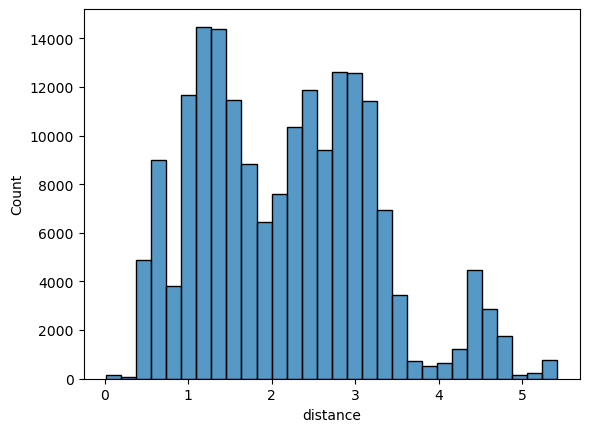

In [102]:
sns.histplot(data=mergedf['distance'],kde=False,bins=30)
plt.show()

<AxesSubplot:xlabel='cab_type,source'>

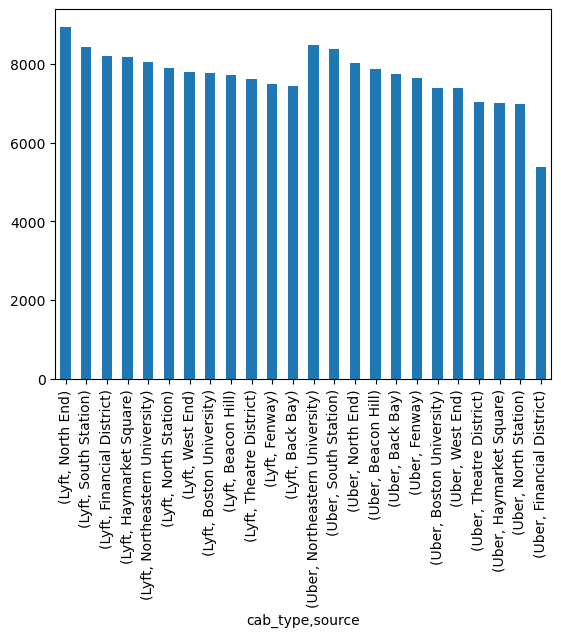

In [103]:
mergedf.groupby(['cab_type'])['source'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cab_type,destination'>

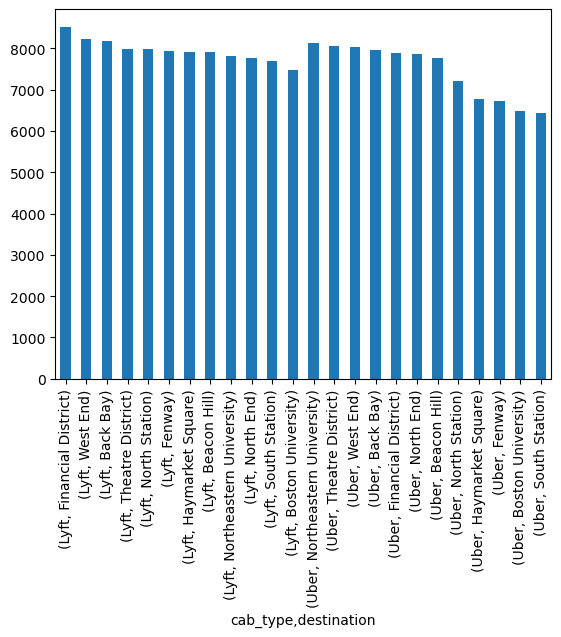

In [104]:
mergedf.groupby(['cab_type'])['destination'].value_counts().plot(kind='bar')

In [105]:
mergedf.groupby('cab_type')['price'].sum()

cab_type
Lyft    1582577.48
Uber    1438271.00
Name: price, dtype: float64

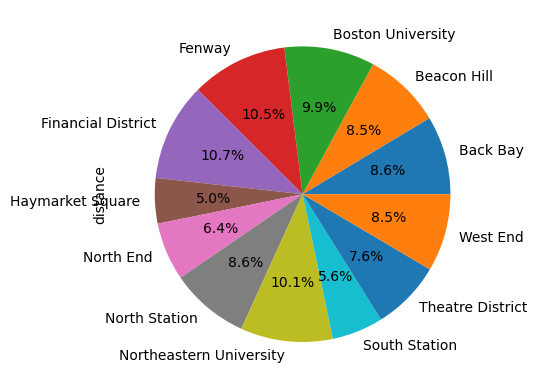

In [106]:
#overall distance to specific destinations
mergedf.groupby('destination')['distance'].sum().plot.pie(autopct="%.1f%%");
plt.show()

<AxesSubplot:>

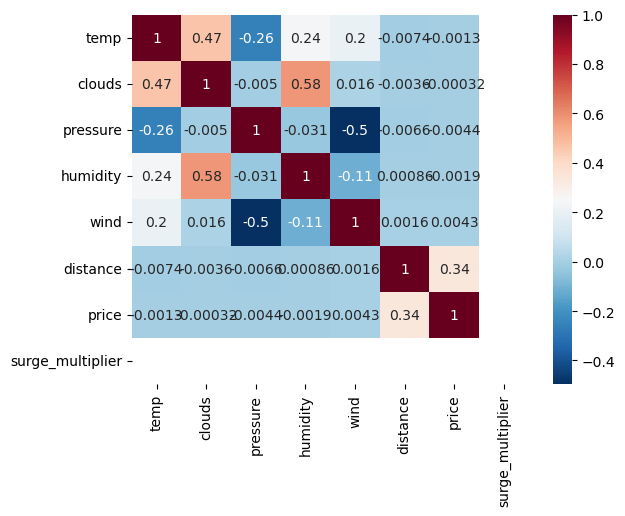

In [107]:
sns.heatmap(mergedf.corr(),annot=True,cmap='RdBu_r')

In [108]:
# since there is no correlation between surge_multiplier with any other columns we can drop it
mergedf = mergedf.drop("surge_multiplier",axis=1,inplace=True)

In [109]:
# since the correlation between columns in weather.csv has no effect on price in cab_rides.csv we can work only on cab_rides.csv
from datetime import datetime
data=cab.copy()
data['time_stamp'] = data['time_stamp'].apply(lambda x: int(x / 1000))
data['time_stamp'] = data['time_stamp'].apply(lambda ts: datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d'))

In [110]:
data.dropna(inplace=True)
data=pd.get_dummies(data,columns=['name','cab_type'])
data.drop([ 'product_id','time_stamp','destination','source','surge_multiplier'],axis=1,inplace=True)
x=data.drop('price',axis=1)
y=data[['price']]

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [112]:
print('train:',x_train.shape)
print('test:',x_test.shape)

train: (486803, 15)
test: (121701, 15)


# XGBOOST

In [124]:
import xgboost as xgb
model = xgb.XGBRegressor(objective="reg:linear",n_estimators=50, max_depth=5,random_state=10, eta=0.1, subsample=0.7, colsample_bytree=0.7)
model.fit(x_train, y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

print("Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("r2_score :{}".format(r2_score(y_test,y_pred_test)))

xgboos_value = r2_score(y_test,y_pred_test) * 100

[00:34:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Root_mean_squared_error :1.7648049054930361
r2_score :0.958119774954664
Root_mean_squared_error :1.7628699297933175
r2_score :0.9581076732342111


# Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))
lr = r2_score(y_test, predictions) * 100

MAE: 1.6103988864147754
MSE: 4.64161972546632
RMSE: 2.1544418593840775
0.9374303825327762


# Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor 
reg3 = RandomForestRegressor(n_estimators=10)
reg3.fit(x_train, y_train)
# Making predictions 
pred3 = reg3.predict(x_test)
pred3
rf = r2_score(y_test,pred3) * 100
#accuracy of the model
print(r2_score(y_test,pred3))
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

C:\Users\paidi\AppData\Local\Temp\ipykernel_3672\2709401943.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg3.fit(x_train, y_train)


0.9643906120613732
MAE: 1.0889326992394504
MSE: 2.641621351677508
RMSE: 1.6253065408339153


# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeRegressor 
reg2= DecisionTreeRegressor()
reg2.fit(x_train, y_train)
# Making predictions 
pred2 = reg2.predict(x_test)
pred2
#accuracy of the model
dt =  r2_score(y_test,pred2) * 100
print(r2_score(y_test,pred2))
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

0.9644360190183788
MAE: 1.08822808166582
MSE: 2.6382529144736093
RMSE: 1.6242699635447333


# Model Evaluation

In [128]:
print("Logistic Regression \t \t \t",lr)
print("Decision Tree Regressor \t \t",dt)
print("Random Forest \t \t \t \t",rf)
print("XGBoost \t \t \t \t",xgboos_value)

Logistic Regression 	 	 	 93.74303825327762
Decision Tree Regressor 	 	 96.44360190183788
Random Forest 	 	 	 	 96.43906120613732
XGBoost 	 	 	 	 95.8107673234211


# Decision Tree Regressor is the best model to predict price of the uber cab